# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

In [1]:
!pip install scikit-learn pandas numpy matplotlib

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [28]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [30]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /home/void/allinfo/dls/sem3/train.csv
100%|████████████████████████████████████████| 664k/664k [00:00<00:00, 8.13MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /home/void/allinfo/dls/sem3/test.csv
100%|████████████████████████████████████████| 218k/218k [00:00<00:00, 5.70MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /home/void/allinfo/dls/sem3/submission.csv
100%|██████████████████████████████████████| 14.7k/14.7k [00:00<00:00, 61.7MB/s]


In [31]:
data = pd.read_csv('./train.csv')
data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [32]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [33]:
binar = []
one_hot_col = []
for i in cat_cols:
    if len(data[i].value_counts()) <= 2:
        binar.append(i)
        print('YES', i)
    else:
        one_hot_col.append(i)
        print('No', i)

YES Sex
YES IsSeniorCitizen
YES HasPartner
YES HasChild
YES HasPhoneService
No HasMultiplePhoneNumbers
No HasInternetService
No HasOnlineSecurityService
No HasOnlineBackup
No HasDeviceProtection
No HasTechSupportAccess
No HasOnlineTV
No HasMovieSubscription
No HasContractPhone
YES IsBillingPaperless
No PaymentMethod


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [35]:
data.isna().any()

ClientPeriod                False
MonthlySpending             False
TotalSpent                  False
Sex                         False
IsSeniorCitizen             False
HasPartner                  False
HasChild                    False
HasPhoneService             False
HasMultiplePhoneNumbers     False
HasInternetService          False
HasOnlineSecurityService    False
HasOnlineBackup             False
HasDeviceProtection         False
HasTechSupportAccess        False
HasOnlineTV                 False
HasMovieSubscription        False
HasContractPhone            False
IsBillingPaperless          False
PaymentMethod               False
Churn                       False
dtype: bool

In [36]:
data.isnull().any()

ClientPeriod                False
MonthlySpending             False
TotalSpent                  False
Sex                         False
IsSeniorCitizen             False
HasPartner                  False
HasChild                    False
HasPhoneService             False
HasMultiplePhoneNumbers     False
HasInternetService          False
HasOnlineSecurityService    False
HasOnlineBackup             False
HasDeviceProtection         False
HasTechSupportAccess        False
HasOnlineTV                 False
HasMovieSubscription        False
HasContractPhone            False
IsBillingPaperless          False
PaymentMethod               False
Churn                       False
dtype: bool

In [37]:
test = set(data[cat_cols].to_numpy().flatten())
'' in test

False

# Нет нулов, нет нанов, не пустых строк

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

array([[<Axes: title={'center': 'ClientPeriod'}>,
        <Axes: title={'center': 'MonthlySpending'}>],
       [<Axes: title={'center': 'IsSeniorCitizen'}>,
        <Axes: title={'center': 'Churn'}>]], dtype=object)

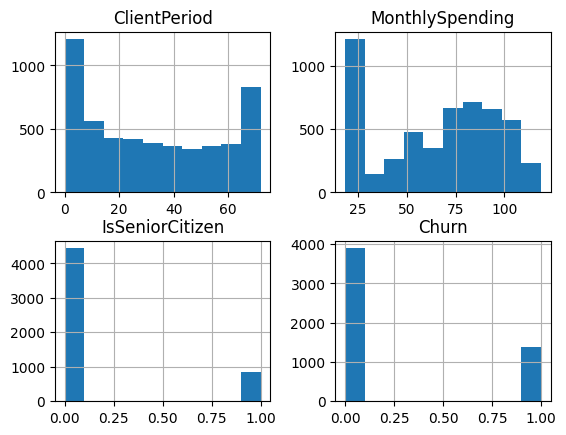

In [38]:
import matplotlib.pyplot as plt

data.hist()

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

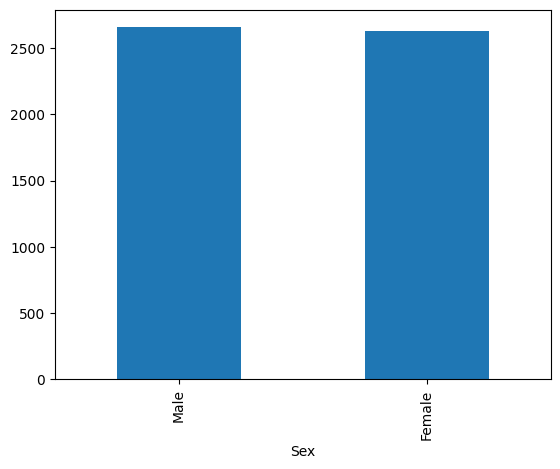

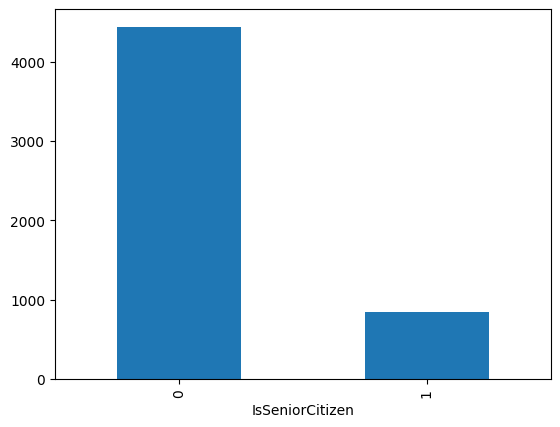

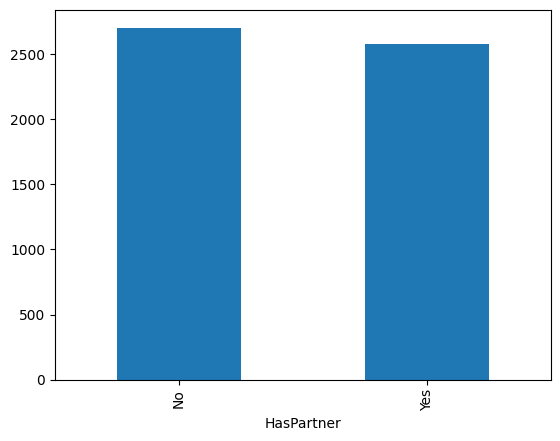

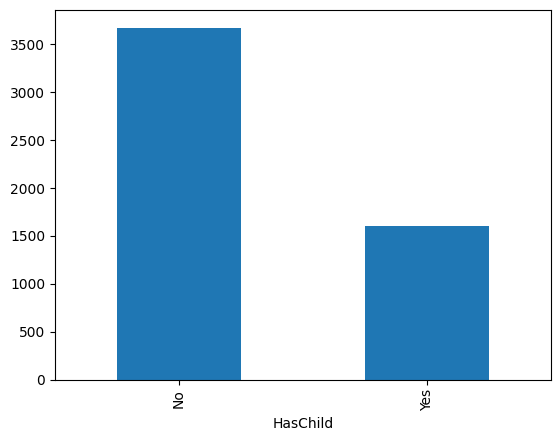

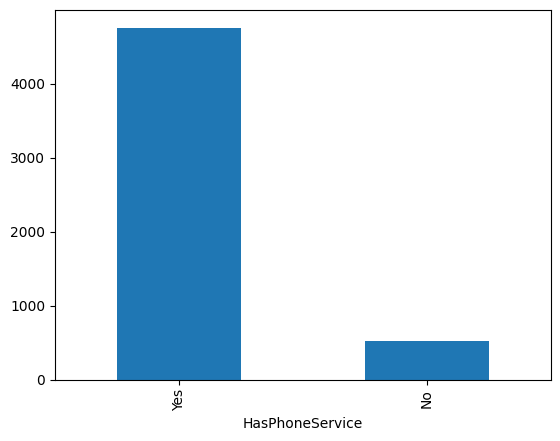

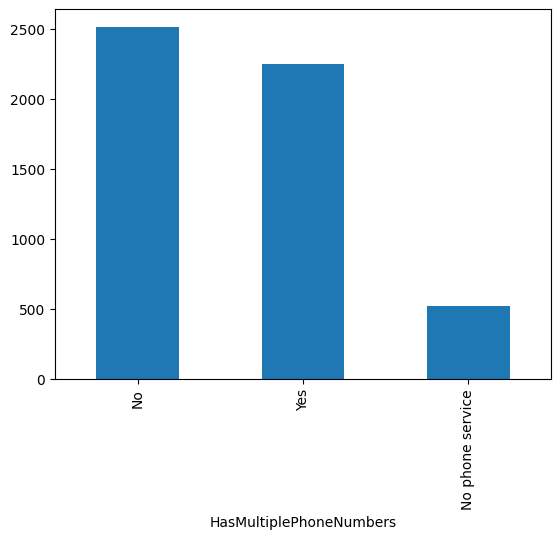

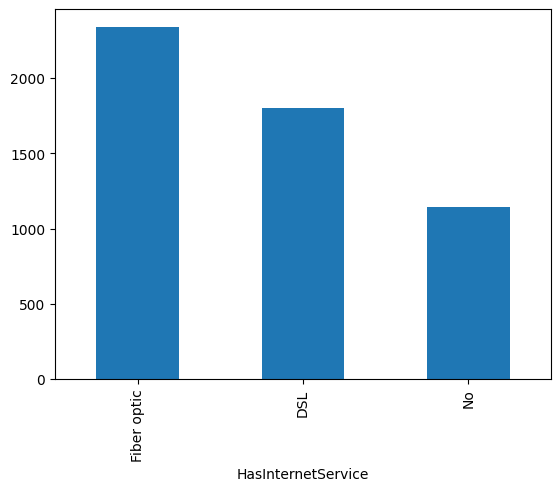

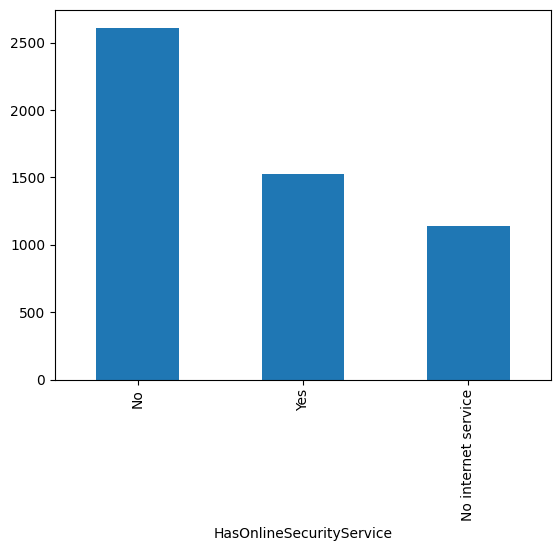

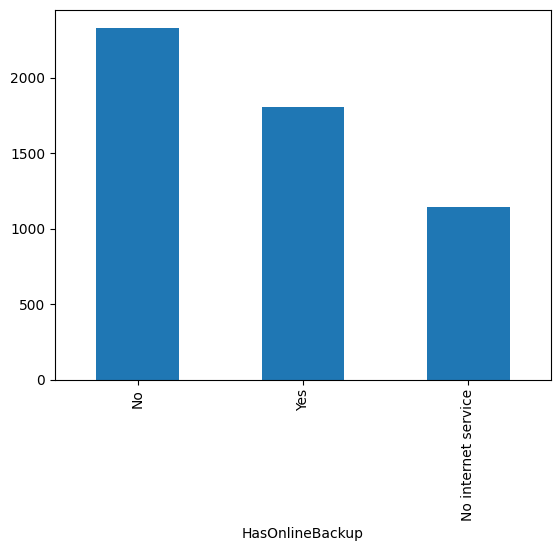

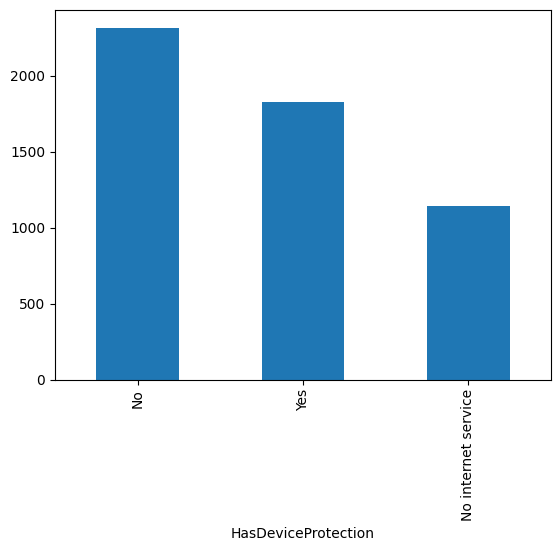

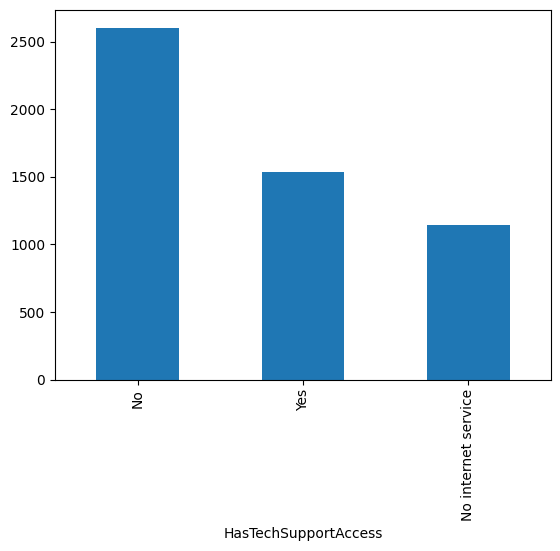

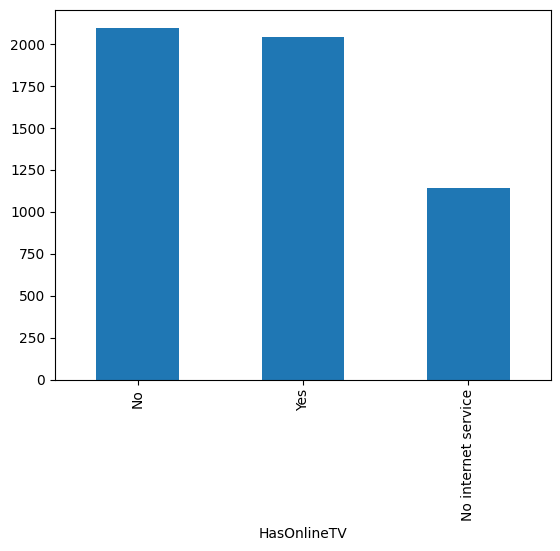

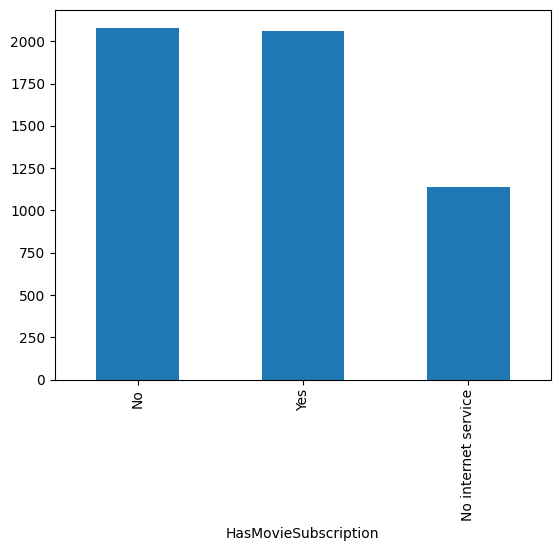

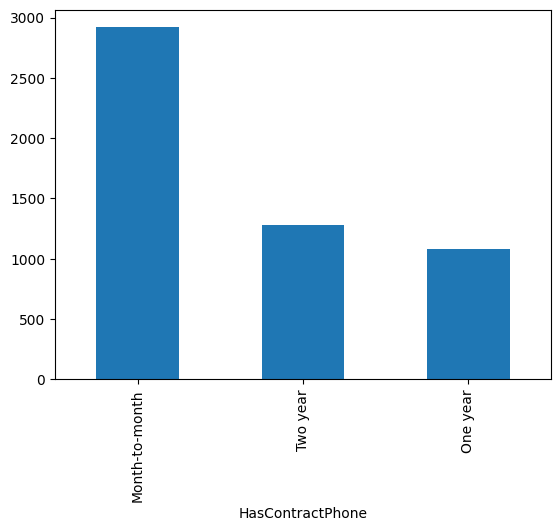

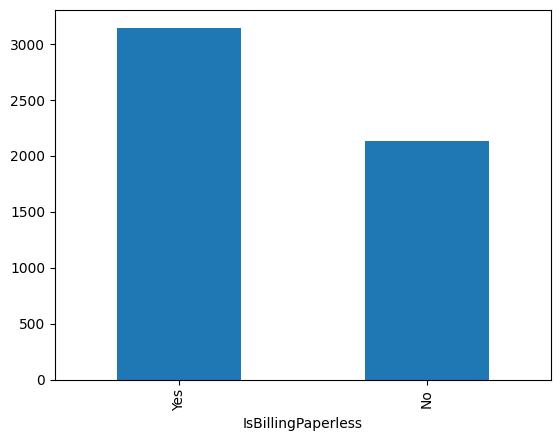

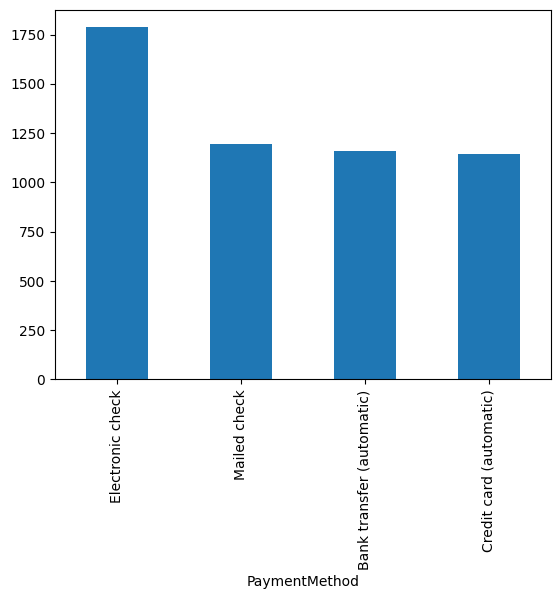

In [39]:
for i in cat_cols:
    counts = data[i].value_counts()
    counts.plot(kind='bar')
    plt.show()



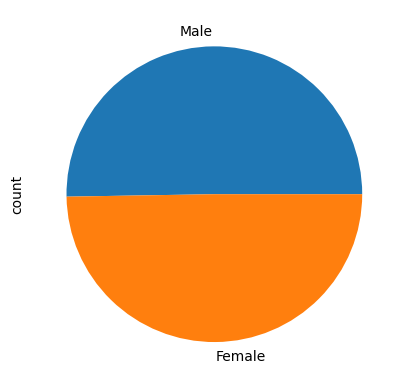

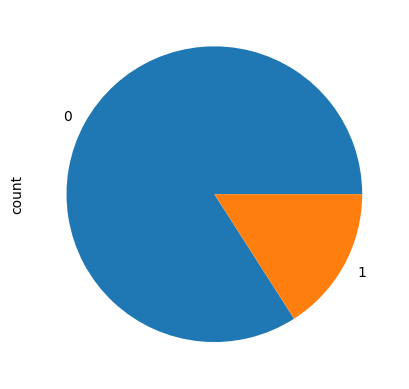

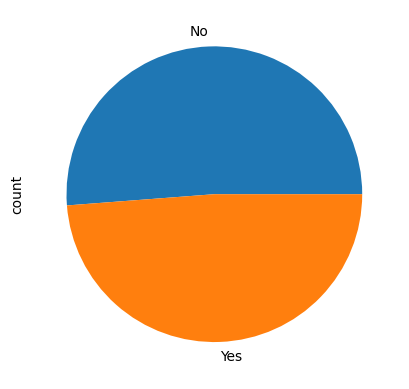

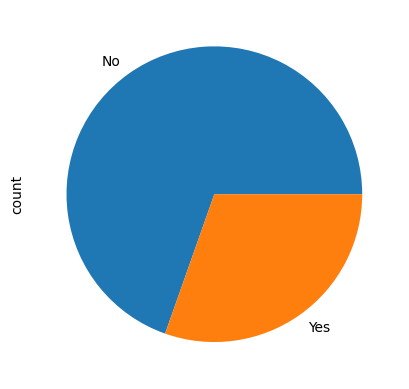

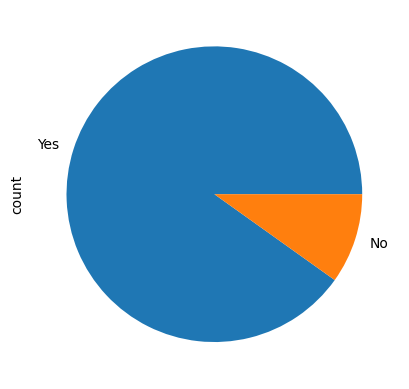

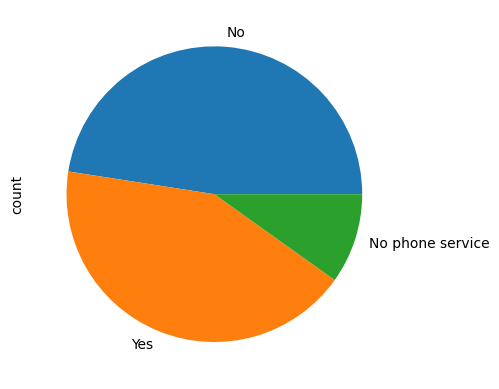

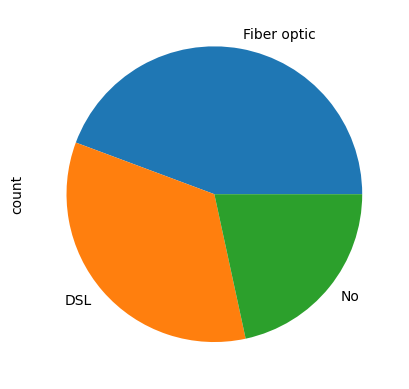

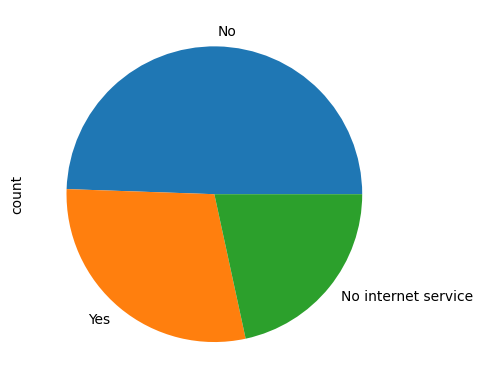

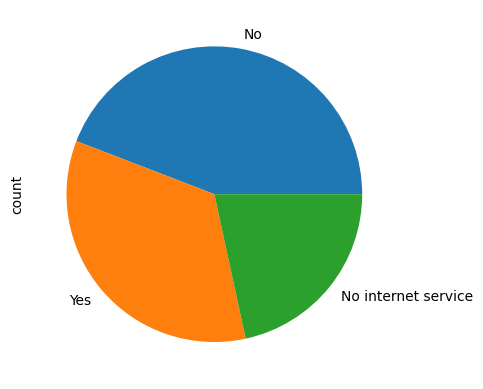

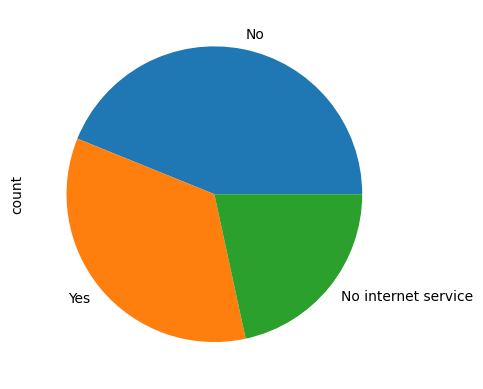

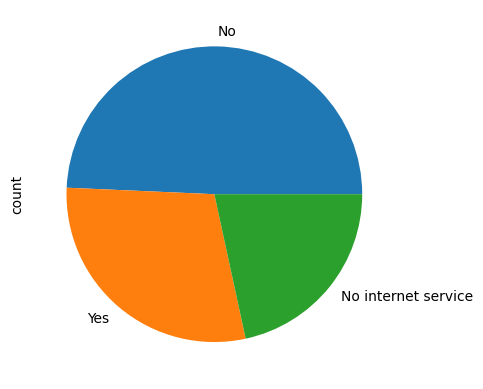

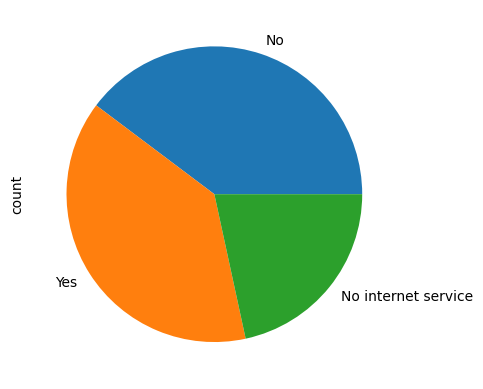

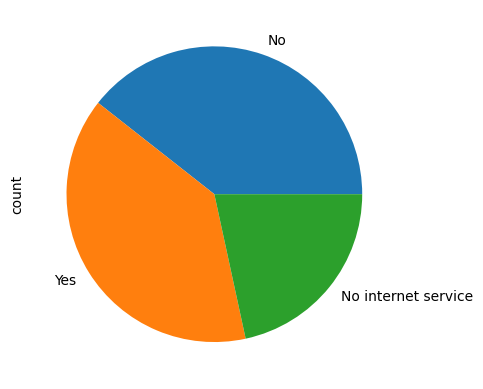

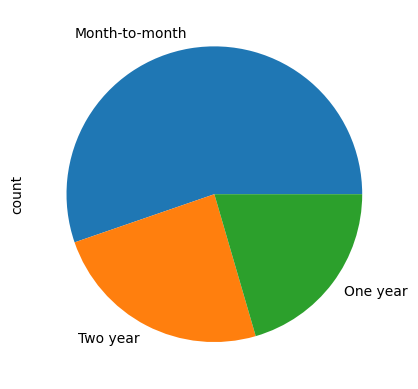

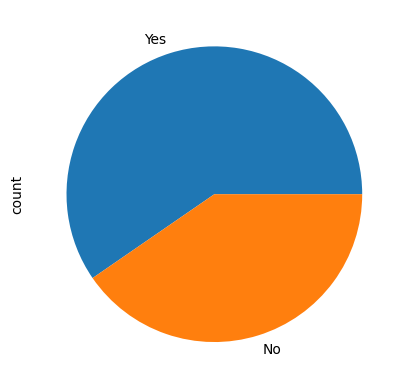

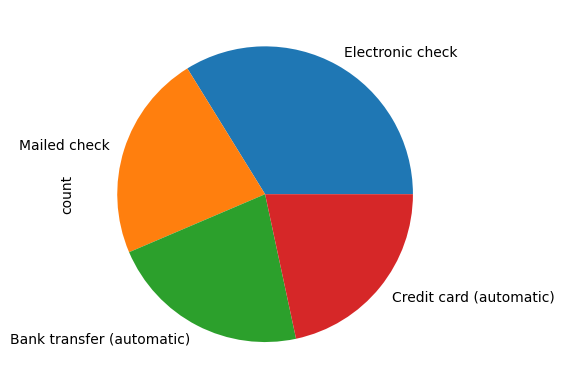

In [40]:
for i in cat_cols:
    counts = data[i].value_counts()
    counts.plot(kind='pie')
    plt.show()


In [41]:
Y.value_counts()

Churn
0    3898
1    1384
Name: count, dtype: int64

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [42]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [43]:
X = data.drop(target_col, axis=1)
Y = data[target_col]

In [44]:
binar

['Sex',
 'IsSeniorCitizen',
 'HasPartner',
 'HasChild',
 'HasPhoneService',
 'IsBillingPaperless']

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [45]:
for i in binar:
    lb = LabelEncoder().fit(X[i])
    X[i] = lb.transform(X[i])
X

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,55,19.50,1026.35,1,0,1,1,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,0,Mailed check
1,72,25.85,1872.2,1,0,1,0,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Credit card (automatic)
2,1,75.90,75.9,1,0,0,0,1,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,1,Electronic check
3,32,79.30,2570,0,1,1,0,1,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,0,Mailed check
4,60,115.25,6758.45,0,0,1,1,1,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,0,Credit card (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,1,0,0,0,0,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,0,Electronic check
5278,50,44.45,2188.45,1,0,1,0,0,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,1,Bank transfer (automatic)
5279,1,55.05,55.05,1,0,0,0,1,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,0,Mailed check
5280,29,76.00,2215.25,0,0,0,0,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Credit card (automatic)


In [46]:
for i in one_hot_col:
    one_hot = OneHotEncoder().fit(X[i].values.reshape(-1, 1))
    data_encode = one_hot.transform(X[i].values.reshape(-1, 1)).toarray()
    X[[i + str(j) for j in range(data_encode.shape[1])]] = data_encode
    X.drop(i, axis=1, inplace=True)
X

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,IsBillingPaperless,HasMultiplePhoneNumbers0,...,HasMovieSubscription0,HasMovieSubscription1,HasMovieSubscription2,HasContractPhone0,HasContractPhone1,HasContractPhone2,PaymentMethod0,PaymentMethod1,PaymentMethod2,PaymentMethod3
0,55,19.50,1026.35,1,0,1,1,1,0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,72,25.85,1872.2,1,0,1,0,1,0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,75.90,75.9,1,0,0,0,1,1,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,32,79.30,2570,0,1,1,0,1,0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,60,115.25,6758.45,0,0,1,1,1,0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,1,0,0,0,0,0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5278,50,44.45,2188.45,1,0,1,0,0,1,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5279,1,55.05,55.05,1,0,0,0,1,0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5280,29,76.00,2215.25,0,0,0,0,1,1,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


TotalSpent содержит пустые строки 

In [47]:
print(X[X['TotalSpent'] == '0']['TotalSpent'].count())
print(X[X['TotalSpent'] == ' ']['TotalSpent'].count())

0
9


In [48]:
X['TotalSpent'] = X['TotalSpent'].replace(' ', '0').astype(float)

In [49]:
median = X['TotalSpent'].drop(0).median()
print(median)
X['TotalSpent'].replace(0, median, inplace=True)

1406.0


In [50]:
X_ss = X.copy()
X_rs = X

In [51]:
rs = RobustScaler().fit(X_rs[num_cols])
X_rs[num_cols] = rs.transform(X_rs[num_cols])
ss = StandardScaler().fit(X_ss[num_cols])
X_ss[num_cols] = ss.transform(X[num_cols])



In [52]:
# xs, xsv, ys, ysv = train_test_split(X_ss,Y,test_size=0.2,stratify=Y)
# xr, xrv, yr, yrv = train_test_split(X_rs,Y,test_size=0.2,stratify=Y)


In [53]:
from sklearn.decomposition import PCA


def grid_cv(pca_variance_list, x, y):
    result_list = []
    for variance in pca_variance_list:
        pca = PCA(n_components=variance, svd_solver='full').fit(x, y)
        x = pca.transform(x)
        grid = GridSearchCV(estimator=LogisticRegression(), param_grid={
            'C': [100, 10, 1, 0.1, 0.01, 0.001],
            'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
            'penalty': ['l1', 'l2', 'elasticnet', None],
        }, n_jobs=8, scoring='roc_auc', cv=5).fit(x, y)
        result_list.append({'grid': grid.best_params_, 'score': grid.best_score_, 'var': variance})
    return result_list

In [54]:
ss_result = grid_cv(np.linspace(0.75, 0.99, 5), X_ss, Y)
rs_result = grid_cv(np.linspace(0.75, 0.99, 5), X_rs, Y)


/home/void/allinfo/dls/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/void/allinfo/dls/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/void/allinfo/dls/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/void/allinfo/dls/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/void/allinfo/dls/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/void/allinfo/dls/venv/lib/python3.11/site-pa

In [55]:

ss_result

[{'grid': {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'},
  'score': 0.8228236256231536,
  'var': 0.75},
 {'grid': {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'},
  'score': 0.8224290723140761,
  'var': 0.81},
 {'grid': {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'},
  'score': 0.8220903076852573,
  'var': 0.87},
 {'grid': {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'},
  'score': 0.8220903076852573,
  'var': 0.9299999999999999},
 {'grid': {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'},
  'score': 0.8220903076852573,
  'var': 0.99}]

In [56]:
rs_result

[{'grid': {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'},
  'score': 0.83530180369297,
  'var': 0.75},
 {'grid': {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'},
  'score': 0.8354700732902328,
  'var': 0.81},
 {'grid': {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'},
  'score': 0.8336742897931406,
  'var': 0.87},
 {'grid': {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'},
  'score': 0.8336742897931406,
  'var': 0.9299999999999999},
 {'grid': {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'},
  'score': 0.8336742897931406,
  'var': 0.99}]

In [57]:
sorted(rs_result, key=lambda x: x['score'])[-1]

{'grid': {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'},
 'score': 0.8354700732902328,
 'var': 0.81}

LogReg best {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
pca variance  0.81
# roc auc 0.8354700732902328

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [58]:
!pip install catboost optuna

In [59]:
from catboost import Pool, cv

data = pd.read_csv('./train.csv')
cv_dataset = Pool(data=data.drop(target_col, axis=1),
                  label=data[target_col],
                  cat_features=cat_cols)

params = {"iterations": 100,
          "depth": 2,
          "loss_function": "Logloss",
          "verbose": False,
          "eval_metric": "AUC"
          }

scores = cv(cv_dataset,
            params,
            fold_count=5)



Training on fold [0/5]

bestTest = 0.8124571878
bestIteration = 98

Training on fold [1/5]

bestTest = 0.8418263445
bestIteration = 99

Training on fold [2/5]

bestTest = 0.8436522262
bestIteration = 97

Training on fold [3/5]

bestTest = 0.839927149
bestIteration = 99

Training on fold [4/5]

bestTest = 0.8703233428
bestIteration = 99


In [71]:
data.shape

(5282, 20)

In [72]:
import numpy as np
import optuna

import catboost as cb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split


def objective(trial):
    X, Y = data.drop(target_col, axis=1), data[target_col]
    train_x, valid_x, train_y, valid_y = train_test_split(X, Y, test_size=0.2, stratify=Y)

    param = {
        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli"]
        ),
        "used_ram_limit": "6gb",
        'max_depth': trial.suggest_int('max_depth', 3, 16),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.005, 0.02, 0.05, 0.08, 0.1]),
        'n_estimators': trial.suggest_int('n_estimators', 2000, 8000),
        'max_bin': trial.suggest_int('max_bin', 100, 400),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 300),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.0001, 1.0, log=True),
        # 'subsample': trial.suggest_float('subsample', 0.1, 0.8),
        'random_seed': 42,
        'task_type': 'CPU',
        'eval_metric': 'AUC',
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    gbm = cb.CatBoostClassifier(cat_features=cat_cols, **param)

    gbm.fit(train_x, train_y, eval_set=[(valid_x, valid_y)], verbose=0, early_stopping_rounds=100)

    preds = gbm.predict(valid_x)
    pred_labels = np.rint(preds)

    auc = roc_auc_score(valid_y, pred_labels)
    return auc



In [73]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, timeout=600, n_jobs=-1)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2023-10-14 02:54:54,036] A new study created in memory with name: no-name-c21508a3-0425-4052-b896-c709bb9d3a3d
[I 2023-10-14 02:54:56,256] Trial 15 finished with value: 0.5 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.0283359081333164, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'max_depth': 9, 'learning_rate': 0.005, 'n_estimators': 2713, 'max_bin': 173, 'min_data_in_leaf': 198, 'l2_leaf_reg': 0.015366646193067126, 'subsample': 0.9041644574083468}. Best is trial 15 with value: 0.5.
[I 2023-10-14 02:54:56,922] Trial 9 finished with value: 0.5 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.022620932349912828, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'max_depth': 5, 'learning_rate': 0.005, 'n_estimators': 2908, 'max_bin': 389, 'min_data_in_leaf': 33, 'l2_leaf_reg': 0.0012287417286063777, 'subsample': 0.38836271082634355}. Best is trial 15 with value: 0.5.
[I 2023-10-14 02:54:57,268] Trial 10 finished with value: 0

Number of finished trials: 100
Best trial:
  Value: 0.7449828751272795
  Params: 
    objective: Logloss
    colsample_bylevel: 0.020616598441155806
    boosting_type: Plain
    bootstrap_type: Bernoulli
    max_depth: 6
    learning_rate: 0.08
    n_estimators: 7076
    max_bin: 360
    min_data_in_leaf: 80
    l2_leaf_reg: 0.0018605771289385963
    subsample: 0.4867068774342712


In [74]:
trial.params

{'objective': 'Logloss',
 'colsample_bylevel': 0.020616598441155806,
 'boosting_type': 'Plain',
 'bootstrap_type': 'Bernoulli',
 'max_depth': 6,
 'learning_rate': 0.08,
 'n_estimators': 7076,
 'max_bin': 360,
 'min_data_in_leaf': 80,
 'l2_leaf_reg': 0.0018605771289385963,
 'subsample': 0.4867068774342712}

In [76]:
data = pd.read_csv('./train.csv')
cv_dataset = Pool(data=data.drop(target_col, axis=1),
                  label=data[target_col],
                  cat_features=cat_cols)

params = {"iterations": 7076,
          "loss_function": "Logloss",
          "verbose": False,
          "eval_metric": "AUC",
          'colsample_bylevel': 0.020616598441155806,
          'boosting_type': 'Plain',
          'bootstrap_type': 'Bernoulli',
          'max_depth': 6,
          'learning_rate': 0.08,
          'max_bin': 360,
          'min_data_in_leaf': 80,
          'l2_leaf_reg': 0.0018605771289385963,
          'subsample': 0.4867068774342712
          }

scores = cv(cv_dataset,
            params,
            fold_count=5)


Training on fold [0/5]

bestTest = 0.822188281
bestIteration = 2014

Training on fold [1/5]

bestTest = 0.8558062575
bestIteration = 3781

Training on fold [2/5]

bestTest = 0.8515666944
bestIteration = 2111

Training on fold [3/5]

bestTest = 0.8445591173
bestIteration = 718

Training on fold [4/5]

bestTest = 0.8652839017
bestIteration = 673


In [95]:
params["iterations"] =  1000
model = cb.CatBoostClassifier(cat_features=cat_cols, **params).fit(cv_dataset)

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

params = {"iterations": 2500,
          "loss_function": "Logloss",
          "verbose": False,
          "eval_metric": "AUC",
          'colsample_bylevel': 0.020616598441155806,
          'boosting_type': 'Plain',
          'bootstrap_type': 'Bernoulli',
          'max_depth': 6,
          'learning_rate': 0.08,
          'max_bin': 360,
          'min_data_in_leaf': 80,
          'l2_leaf_reg': 0.0018605771289385963,
          'subsample': 0.4867068774342712
          }
Training on fold [0/5]

bestTest = 0.822188281
bestIteration = 2014

Training on fold [1/5]

bestTest = 0.8558062575
bestIteration = 3781

Training on fold [2/5]

bestTest = 0.8515666944
bestIteration = 2111

Training on fold [3/5]

bestTest = 0.8445591173
bestIteration = 718

Training on fold [4/5]

bestTest = 0.8652839017
bestIteration = 673

# Предсказания

In [96]:
best_model =  model

In [97]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] =   best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv',index=False)

Лучшее решение отправьте в Stepik.

In [93]:
submission

,Id,Churn
0,0,0.059618
1,1,0.697245
2,2,0.660676
3,3,0.008498
4,4,0.004276
...,...,...
1756,1756,0.098587
1757,1757,0.010465
1758,1758,0.836037
1759,1759,0.559308
